In [111]:
import cv2
from matplotlib import pyplot
import numpy

# Ustawienie rozmarów wyświetlanych obrazów
pyplot.rcParams["figure.figsize"] = (18, 10)

In [112]:
#
# Wczytanie obrazów źródłowych
#
# źródło grafiki colors.jpg: https://unsplash.com/photos/gT5kuls6Y6Q
# źródło grafiki gacław-na-kuchni.jpg: własne
#
#image_from_file = cv2.imread('images/colors.jpg')
image_from_file = cv2.imread('images/gacław-na-kuchni.jpg')
image_gray = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB)
print('Rozmiar obrazka: ', image_from_file.shape)

Rozmiar obrazka:  (768, 1024, 3)


# Zadanie 1

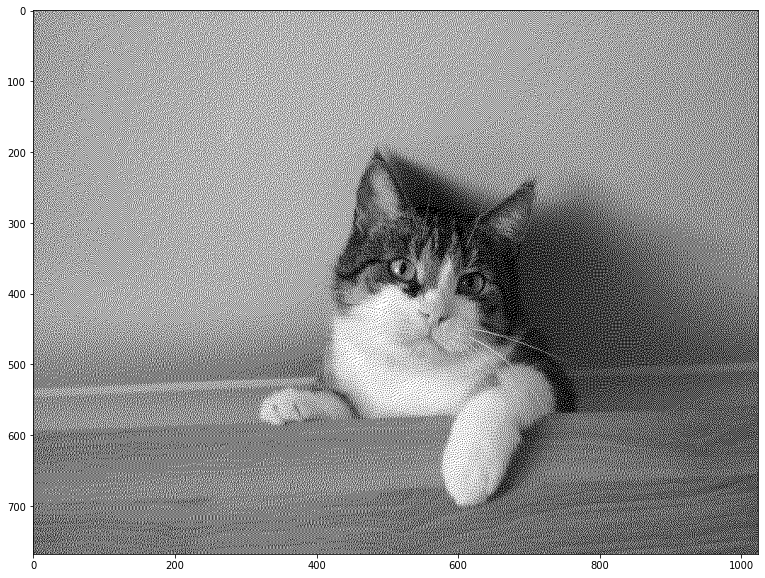

In [113]:
output = numpy.copy(image_gray)

#
# Algorytm
#
for y in range(0, output.shape[0]):
    for x in range(0, output.shape[1]):
        oldpixel = output[y][x]
        newpixel = int(round(oldpixel / 255) * 255)        
        output[y][x] = newpixel
        
        quant_error = oldpixel - newpixel
        
        if x < output.shape[1] - 1:
            new_value = output[y][x + 1] + quant_error * 7 / 16
            
            if new_value > 255:
                new_value = 255
            if new_value < 0:
                new_value = 0
            
            output[y][x + 1] = new_value
                
        if y < output.shape[0] - 1 and x > 0:
            new_value = output[y + 1][x - 1] + quant_error * 3 / 16
            
            if new_value > 255:
                new_value = 255
            if new_value < 0:
                new_value = 0
                
            output[y + 1][x - 1] = new_value
            
        if y < output.shape[0] - 1:
            new_value = output[y + 1][x] + quant_error * 5 / 16
            
            if new_value > 255:
                new_value = 255
            if new_value < 0:
                new_value = 0
                
            output[y + 1][x] = new_value
            
        if x < output.shape[1] - 1 and y < output.shape[0] - 1:
            new_value = output[y + 1][x + 1] + quant_error * 1 / 16 
            
            if new_value > 255:
                new_value = 255
            if new_value < 0:
                new_value = 0
                
            output[y + 1][x + 1] = new_value

#
# Wyświetlenie
#
pyplot.imshow(output, cmap='gray')

Text(0, 0.5, 'Liczba pikseli obrazu []')

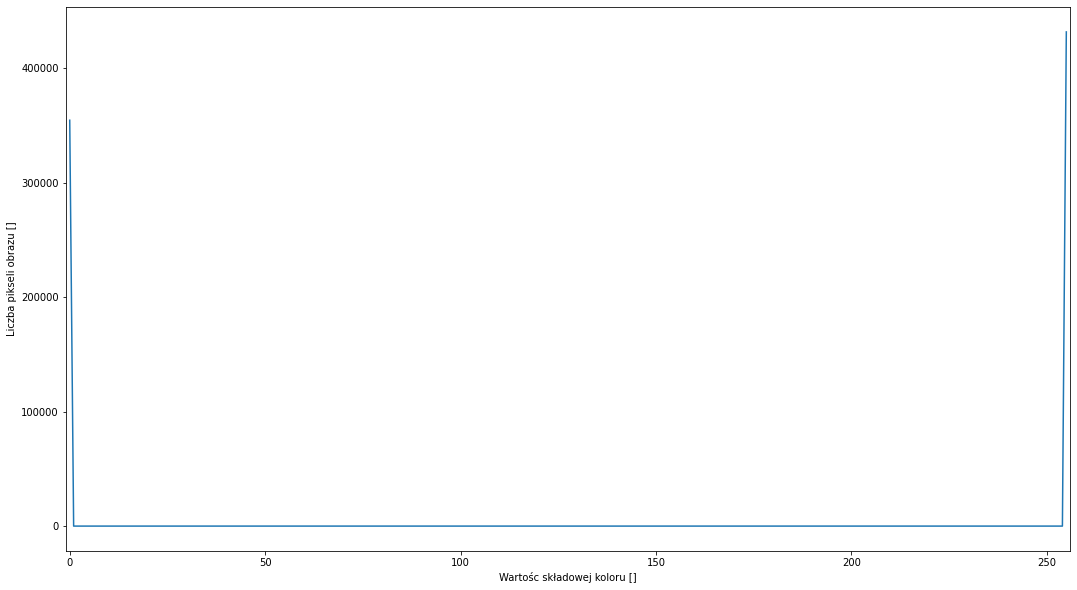

In [114]:
#
# Histogram
#
histr = cv2.calcHist([output], [0], None, [256], [0, 256])
pyplot.plot(histr)
pyplot.xlim([-1, 256])
pyplot.xlabel('Wartośc składowej koloru []')
pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 2

In [ ]:
output = numpy.copy(image_color)
k = 2
#
# Algorytm
#
for y in range(0, output.shape[0]):
    for x in range(0, output.shape[1]):
        for z in range(3):
            oldpixel = output[y][x][z]
            newpixel = round((k - 1) * oldpixel / 255) * 255 / (k - 1)        
            output[y][x][z] = newpixel

            quant_error = oldpixel - newpixel

            if x < output.shape[1] - 1:
                new_value = output[y][x + 1][z] + quant_error * 7 / 16

                if new_value > 255:
                    new_value = 255
                if new_value < 0:
                    new_value = 0

                output[y][x + 1][z] = new_value

            if y < output.shape[0] - 1 and x > 0:
                new_value = output[y + 1][x - 1][z] + quant_error * 3 / 16

                if new_value > 255:
                    new_value = 255
                if new_value < 0:
                    new_value = 0

                output[y + 1][x - 1][z] = new_value

            if y < output.shape[0] - 1:
                new_value = output[y + 1][x][z] + quant_error * 5 / 16

                if new_value > 255:
                    new_value = 255
                if new_value < 0:
                    new_value = 0

                output[y + 1][x][z] = new_value

            if x < output.shape[1] - 1 and y < output.shape[0] - 1:
                new_value = output[y + 1][x + 1][z] + quant_error * 1 / 16 

                if new_value > 255:
                    new_value = 255
                if new_value < 0:
                    new_value = 0

                output[y + 1][x + 1][z] = new_value

#
# Wyświetlenie
#
pyplot.imshow(output)

In [ ]:
#
# Histogram
#
color = ('r', 'g', 'b')

for i, col in enumerate(color):
    histr = cv2.calcHist([output], [i], None, [256], [0, 256])
    pyplot.plot(histr, color=col)
    pyplot.xlim([-1, 256])
    pyplot.xlabel('Wartośc składowej koloru []')
    pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 3

In [ ]:
import cv2
from matplotlib import pyplot
import numpy

#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):    
    delta_x = abs(x2 - x1)
    delta_y = abs(y2 - y1)
    
    d = 0
    
    if delta_x > delta_y:
        d = 2 * delta_y - delta_x
    else:
        d = 2 * delta_x - delta_y
        
    y = y1
    x = x1
    
    length = x2 - x1
    length += y2 - y1
        
    for point in range(0, length + 1):
       
        draw_point(image, int(x), int(y)) 
        
        x_i = 0
        y_i = 0
        
        if x2 - x != 0:
            x_i = (x2 - x) / abs(x2 - x)
        if y2 - y != 0:
            y_i = (y2 - y) / abs(y2 - y)
    
        if delta_x > delta_y:
                x += x_i
                d += 2 * delta_y            
        else:
                y += y_i
                d += 2 * delta_x  
    
        if d >= 0:    
            if delta_x > delta_y:
                y += y_i
                d -= 2 * delta_x        
            else:
                x += x_i
                d -= 2 * delta_y                     
                    

#
# Funkcja rysująca trójkąt
#
def area(a, b, c):
    return (c[0] - a[0]) * (b[1] - a[1]) - (c[1] - a[1]) * (b[0] - a[0])

def draw_triangle(image, a, b, c):
    x_min = min(a[0], b[0], c[0])
    x_max = max(a[0], b[0], c[0])
    
    y_min = min(a[1], b[1], c[1])
    y_max = max(a[1], b[1], c[1])
        
    for x in range(x_min, x_max + 1):
        for y in range(y_min, y_max + 1):
            
            area_1 = area(a, b, (x, y))
            area_2 = area(b, c, (x, y))
            area_3 = area(c, a, (x, y))
            
            if (area_1 >= 0 and area_2 >= 0 and area_3 >= 0) or (area_1 < 0 and area_2 < 0 and area_3 < 0):
                draw_point(image, x, y)
                
#
# Rysowanie
#

#draw_line(image, 0, 0, 40, 50)
draw_triangle(image, (10, 10), (25, 35), (40, 10))

#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 4

In [ ]:
import cv2
from matplotlib import pyplot
import numpy

#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, color_1, x2, y2, color_2):    
    delta_x = abs(x2 - x1)
    delta_y = abs(y2 - y1)
    
    d = 0
    
    if delta_x > delta_y:
        d = 2 * delta_y - delta_x
    else:
        d = 2 * delta_x - delta_y
        
    y = y1
    x = x1
    
    length = x2 - x1
    length += y2 - y1
        
    for point in range(length + 1):
       
        t = point / length
        
        c1 = color_1.copy()
        c2 = color_2.copy()
    
        c2[0] -= c1[0]
        c2[1] -= c1[1]
        c2[2] -= c1[2]
        c2[0] *= t
        c2[1] *= t
        c2[2] *= t        
        c2[0] += c1[0]
        c2[1] += c1[1]
        c2[2] += c1[2]
        
        new_color=(c2[0], c2[1], c2[2])  
            
        draw_point(image, int(x), int(y), color=new_color) 
        
        x_i = 0
        y_i = 0
        
        if x2 - x != 0:
            x_i = (x2 - x) / abs(x2 - x)
        if y2 - y != 0:
            y_i = (y2 - y) / abs(y2 - y)
    
        if delta_x > delta_y:
                x += x_i
                d += 2 * delta_y            
        else:
                y += y_i
                d += 2 * delta_x  
    
        if d >= 0:    
            if delta_x > delta_y:
                y += y_i
                d -= 2 * delta_x        
            else:
                x += x_i
                d -= 2 * delta_y                     
                    

#
# Funkcja rysująca trójkąt
#
def area(a, b, c):
    return (c[0] - a[0]) * (b[1] - a[1]) - (c[1] - a[1]) * (b[0] - a[0])

def draw_triangle(image, a, b, c):
    x_min = min(a[0], b[0], c[0])
    x_max = max(a[0], b[0], c[0])
    
    y_min = min(a[1], b[1], c[1])
    y_max = max(a[1], b[1], c[1])
        
    for x in range(x_min, x_max + 1):
        for y in range(y_min, y_max + 1):
            
            color1 = a[2].copy()
            color2 = b[2].copy()
            color3 = c[2].copy()
            
            area_abc = area(a, b, c)
            area_1 = area(a, b, (x, y))
            area_2 = area(b, c, (x, y))
            area_3 = area(c, a, (x, y))
            
            color1[0] *= (area_1 / area_abc)
            color1[1] *= (area_1 / area_abc)
            color1[2] *= (area_1 / area_abc)
            
            color2[0] *= (area_2 / area_abc)
            color2[1] *= (area_2 / area_abc)
            color2[2] *= (area_2 / area_abc)
            
            color3[0] *= (area_3 / area_abc)
            color3[1] *= (area_3 / area_abc)
            color3[2] *= (area_3 / area_abc)
            
            color1[0] += (color2[0] + color3[0])
            color1[1] += (color2[1] + color3[1])
            color1[2] += (color2[2] + color3[2])
            
            new_color = (color1[0], color1[1], color1[2])
            
            if (area_1 >= 0 and area_2 >= 0 and area_3 >= 0) or (area_1 < 0 and area_2 < 0 and area_3 < 0):
                draw_point(image, x, y, color=new_color)


#
# Rysowanie
#

#draw_line(image, 10, 0, [0.0, 255.0, 0.0], 40, 30, [0.0, 0.0, 255.0])
draw_triangle(image, (10, 10, [0.0, 255.0, 0.0]), (25, 35, [0.0, 0.0, 255.0]), (40, 10, [255.0, 0.0, 0.0]))

#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 5

In [ ]:
import cv2
from matplotlib import pyplot
import numpy
import PIL
from PIL import Image

#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)

#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):    
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, color_1, x2, y2, color_2, width, height):
       
    new_image = numpy.zeros((height * 2, width * 2, 3), dtype=numpy.uint8)
    
    x1 *= 2
    y1 *= 2
    x2 *= 2
    y2 *= 2
    
    delta_x = abs(x2 - x1)
    delta_y = abs(y2 - y1)
    
    d = 0
    
    if delta_x > delta_y:
        d = 2 * delta_y - delta_x
    else:
        d = 2 * delta_x - delta_y
        
    y = y1
    x = x1
    
    length = x2 - x1
    length += y2 - y1
        
    for point in range(length + 1):
       
        t = point / length
        
        c1 = color_1.copy()
        c2 = color_2.copy()
    
        c2[0] -= c1[0]
        c2[1] -= c1[1]
        c2[2] -= c1[2]
        c2[0] *= t
        c2[1] *= t
        c2[2] *= t        
        c2[0] += c1[0]
        c2[1] += c1[1]
        c2[2] += c1[2]
        
        new_color=(c2[0], c2[1], c2[2])  
       
        draw_point(new_image, int(x), int(y), color=new_color) 
        
        x_i = 0
        y_i = 0
        
        if x2 - x != 0:
            x_i = (x2 - x) / abs(x2 - x)
        if y2 - y != 0:
            y_i = (y2 - y) / abs(y2 - y)
    
        if delta_x > delta_y:
                x += x_i
                d += 2 * delta_y            
        else:
                y += y_i
                d += 2 * delta_x  
    
        if d >= 0:    
            if delta_x > delta_y:
                y += y_i
                d -= 2 * delta_x        
            else:
                x += x_i
                d -= 2 * delta_y
           
   
    new_dim = (width, height)
        
    image = cv2.resize(new_image, new_dim, interpolation=cv2.INTER_AREA)
    
    return image
    
    
#
# Funkcja rysująca trójkąt
#
def area(a, b, c):
    return (c[0] - a[0]) * (b[1] - a[1]) - (c[1] - a[1]) * (b[0] - a[0])

def draw_triangle(image, a, b, c, width, height):
    
    new_image = numpy.zeros((height * 2, width * 2, 3), dtype=numpy.uint8)

    a[0] *= 2
    a[1] *= 2
    b[0] *= 2
    b[1] *= 2
    c[0] *= 2
    c[1] *= 2
    
    x_min = min(a[0], b[0], c[0])
    x_max = max(a[0], b[0], c[0])
    
    y_min = min(a[1], b[1], c[1])
    y_max = max(a[1], b[1], c[1])
        
    for x in range(x_min, x_max + 1):
        for y in range(y_min, y_max + 1):
            
            color1 = a[2].copy()
            color2 = b[2].copy()
            color3 = c[2].copy()
            
            area_abc = area(a, b, c)
            area_1 = area(a, b, (x, y))
            area_2 = area(b, c, (x, y))
            area_3 = area(c, a, (x, y))
            
            color1[0] *= (area_1 / area_abc)
            color1[1] *= (area_1 / area_abc)
            color1[2] *= (area_1 / area_abc)
            
            color2[0] *= (area_2 / area_abc)
            color2[1] *= (area_2 / area_abc)
            color2[2] *= (area_2 / area_abc)
            
            color3[0] *= (area_3 / area_abc)
            color3[1] *= (area_3 / area_abc)
            color3[2] *= (area_3 / area_abc)
            
            color1[0] += (color2[0] + color3[0])
            color1[1] += (color2[1] + color3[1])
            color1[2] += (color2[2] + color3[2])
            
            new_color = (color1[0], color1[1], color1[2])
            
            if (area_1 >= 0 and area_2 >= 0 and area_3 >= 0) or (area_1 < 0 and area_2 < 0 and area_3 < 0):
                draw_point(new_image, x, y, color=new_color)
                
    new_dim = (width, height)        
    image = cv2.resize(new_image, new_dim, interpolation=cv2.INTER_AREA)
    
    return image


#
# Rysowanie
#

#image = draw_line(image, 10, 0, [0.0, 255.0, 0.0], 40, 30, [0.0, 0.0, 255.0], width, height)
image = draw_triangle(image, [10, 10, [0.0, 255.0, 0.0]], [25, 35, [0.0, 0.0, 255.0]], [40, 10, [255.0, 0.0, 0.0]], width, height)

#
# Wyświetlenie
#
pyplot.imshow(image)